In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import data_utils as data_utils

dataset = pd.read_csv("datasets/dataset_clean.csv")

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)
print(dataset.shape)
dataset.head()

C:\Users\mrugeles\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(175360, 73)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,ENT_MPIO_DANE_is_missing,ENT_COD_MPIO_is_missing,ENT_COD_DEPTO_is_missing,ENT_COD_SNS_is_missing,AFEC_EDADR_is_missing,PET_MPIO_is_missing,AFEC_MPIO_is_missing,PATOLOGIA_TIPO_is_missing,ENT_TIPOVIG_SNS_is_missing,PET_TIPOPER_is_missing
0,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
1,santander,de 13 a 17 años,secundaria,hombre,no aplica,bucaramanga,padre,no aplica,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
2,tolima,de 13 a 17 años,posgrado,hombre,no aplica,ibagué,padre,no aplica,régimen especial,natural,...,0,0,0,0,0,0,0,0,0,0
3,santander,de 6 a 12 años,ninguno,mujer,no aplica,barrancabermeja,madre,persona en condición de discapacidad,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
4,bogota d.c.,de 6 a 12 años,ninguno,hombre,no aplica,bogotá,nombre propio,no aplica,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0


## Encoding dataset
All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features.

In [2]:
from category_encoders.ordinal import OrdinalEncoder

ordinal_cols_mapping = [{
    "col":"AFEC_EDADR",    
    "mapping": {
        'de 0 a 5 años': 0, 
        'de 6 a 12 años': 1, 
        'de 13 a 17 años': 3, 
        'de 18 a 24 años': 4, 
        'de 25 a 29 años': 5, 
        'de 30 a 37 años': 6, 
        'de 38 a 49 años': 7, 
        'de 50 a 62 años': 8, 
        'mayor de 63 años': 9, 
        '999': 999
    }}
]


encoder = OrdinalEncoder(mapping = ordinal_cols_mapping, 
                         return_df = True)  
features[['AFEC_EDADR']] = encoder.fit_transform(features[['AFEC_EDADR']])



In [3]:
ordinal_cols_mapping = [{
    "col":"AFEC_EDUC",    
    "mapping": {
        'ninguno': 0, 
        'primaria incompleta': 1, 
        'primaria': 3, 
        'secundaria incompleta': 4, 
        'secundaria': 5, 
        'universitario incompleto': 6, 
        'universitario': 7, 
        'posgrado': 8, 
        '999': 999
    }},
]

encoder = OrdinalEncoder(mapping = ordinal_cols_mapping, 
                         return_df = True)  
features[['AFEC_EDUC']] = encoder.fit_transform(features[['AFEC_EDUC']])
features[['AFEC_EDUC']].head()

,AFEC_EDUC
0,0
1,5
2,8
3,0
4,0


In [4]:
features.columns

Index(['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO',
       'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL',
       'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'CIE_10', 'COD_MACROMOT',
       'COD_MOTESP', 'COD_MOTGEN', 'ENT_AMBITOIVC', 'ENT_COD_DEPTO',
       'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_MPIO_DANE', 'ENT_NOMBRE',
       'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS', 'IDPATOLOGIA_2', 'MES', 'PATOLOGIA_1',
       'PATOLOGIA_TIPO', 'PET_COD_DEPTO', 'PET_MPIO', 'PET_TIPOPER',
       'PQR_CANAL', 'PQR_CLASE_SNS', 'PQR_TIPOPETICION', 'TRIM', 'CAPITULO',
       'NOMBRE_CAPITULO', 'COD_CIE_10_03', 'DESCRIPCION_COD_CIE_10_03',
       'COD_CIE_10_04', 'DESCRIPCION_COD_CIE_10_04', 'SEXO',
       'LIMITE_INFERIOR_EDAD', 'LIMITE_SUPERIOR_EDAD', 'CIE10_SEXO',
       'LIMITE_INFERIOR_EDAD_Y', 'LIMITE_SUPERIOR_EDAD_Y', 'AFEC_EDADR_INF',
       'AFEC_EDADR_SUP', 'CIE10_RANGO_EDAD', 'AFEC_GENERO_is_missing',
       'ENT_AMBITOIVC_is_missing', 'IDPATOLOGIA_2_is_missing',
       'ENT_TIP

In [5]:
features_columns = list(features.columns)
features_columns.remove('AFEC_EDADR')
features_columns.remove('AFEC_EDUC')
features.head()

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,ENT_MPIO_DANE_is_missing,ENT_COD_MPIO_is_missing,ENT_COD_DEPTO_is_missing,ENT_COD_SNS_is_missing,AFEC_EDADR_is_missing,PET_MPIO_is_missing,AFEC_MPIO_is_missing,PATOLOGIA_TIPO_is_missing,ENT_TIPOVIG_SNS_is_missing,PET_TIPOPER_is_missing
0,risaralda,3,0,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
1,santander,3,5,hombre,no aplica,bucaramanga,padre,no aplica,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
2,tolima,3,8,hombre,no aplica,ibagué,padre,no aplica,régimen especial,natural,...,0,0,0,0,0,0,0,0,0,0
3,santander,1,0,mujer,no aplica,barrancabermeja,madre,persona en condición de discapacidad,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
4,bogota d.c.,1,0,hombre,no aplica,bogotá,nombre propio,no aplica,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

features = data_utils.encode_features(features, labels)
display(features.head(n = 5))

In [6]:
'''
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler


features_columns = [column for column in features_columns if '_is_missing' not in column]

le = preprocessing.LabelEncoder()
scaler = MinMaxScaler()

for column in features_columns:
    if(features[column].dtype == 'O'):
        features[column] = features[column].astype(str)
        le.fit(features[column])
        features[column] = le.transform(features[column])    
        #features[column] = features[column].astype(int)
        #features[column] = scaler.fit_transform(features[column].values.reshape(-1, 1))
        
#features[features_columns] = features[features_columns].apply(lambda x: np.log(x + 1))      

features.head()

features_stats = features.describe().T
features_stats = list(features_stats[features_stats['max'] > 1].index)

for column in features_stats:
    features[column] = features[column].astype(int)
    features[column] = scaler.fit_transform(features[column].values.reshape(-1, 1))
        
features[features_columns] = features[features_columns].apply(lambda x: np.log(x + 1))   
features[features_columns].head()
'''


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,ENT_MPIO_DANE_is_missing,ENT_COD_MPIO_is_missing,ENT_COD_DEPTO_is_missing,ENT_COD_SNS_is_missing,AFEC_EDADR_is_missing,PET_MPIO_is_missing,AFEC_MPIO_is_missing,PATOLOGIA_TIPO_is_missing,ENT_TIPOVIG_SNS_is_missing,PET_TIPOPER_is_missing
0,26,3,0,1,5,313,13,5,1,2,...,0,0,0,0,0,0,0,0,0,0
1,28,3,5,1,5,129,13,4,1,2,...,0,0,0,0,0,0,0,0,0,0
2,30,3,8,1,5,468,13,4,4,2,...,0,0,0,0,0,0,0,0,0,0
3,28,1,0,2,5,95,9,5,1,2,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,1,5,119,11,4,1,2,...,0,0,0,0,0,0,0,0,0,0


## Store processed dataset

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

features['RIESGO_VIDA'] = labels

features.to_csv("datasets/encoded_dataset.csv", index = False)

## Post Processing Exploration

In [10]:
features.columns

Index(['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO',
       'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL',
       'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'CIE_10', 'COD_MACROMOT',
       'COD_MOTESP', 'COD_MOTGEN', 'ENT_AMBITOIVC', 'ENT_COD_DEPTO',
       'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_MPIO_DANE', 'ENT_NOMBRE',
       'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS', 'IDPATOLOGIA_2', 'MES', 'PATOLOGIA_1',
       'PATOLOGIA_TIPO', 'PET_COD_DEPTO', 'PET_MPIO', 'PET_TIPOPER',
       'PQR_CANAL', 'PQR_CLASE_SNS', 'PQR_TIPOPETICION', 'TRIM', 'CAPITULO',
       'NOMBRE_CAPITULO', 'COD_CIE_10_03', 'DESCRIPCION_COD_CIE_10_03',
       'COD_CIE_10_04', 'DESCRIPCION_COD_CIE_10_04', 'SEXO',
       'LIMITE_INFERIOR_EDAD', 'LIMITE_SUPERIOR_EDAD', 'CIE10_SEXO',
       'LIMITE_INFERIOR_EDAD_Y', 'LIMITE_SUPERIOR_EDAD_Y', 'AFEC_EDADR_INF',
       'AFEC_EDADR_SUP', 'CIE10_RANGO_EDAD', 'AFEC_GENERO_is_missing',
       'ENT_AMBITOIVC_is_missing', 'IDPATOLOGIA_2_is_missing',
       'ENT_TIP

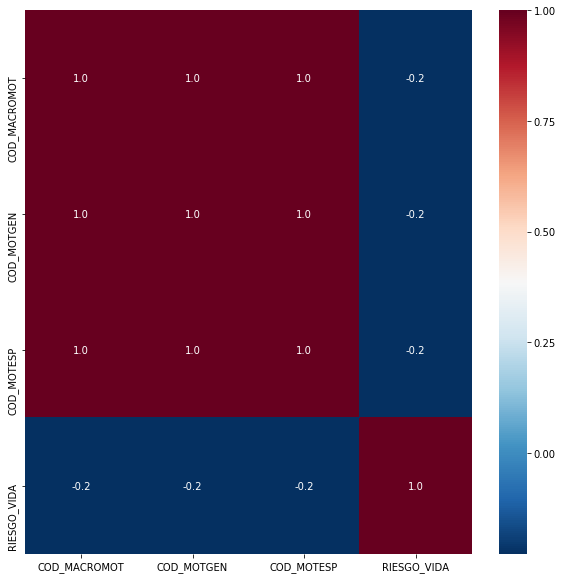

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 10))

ax = sns.heatmap(features[['COD_MACROMOT', 'COD_MOTGEN', 'COD_MOTESP', 'RIESGO_VIDA']].corr(), cmap = "RdBu_r", annot=True, fmt='.1f')